In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
# Load the dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv') 



In [18]:
# Display the first few rows of the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [20]:
# Check for missing values
print("Missing values:\n", titanic_data.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
# Get basic statistics
print(titanic_data.describe(include='all'))


        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [24]:
# Create a pivot table for survival rates based on gender and class
survival_rate = titanic_data.pivot_table('Survived', 'Pclass', 'Sex')
print(survival_rate)


Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


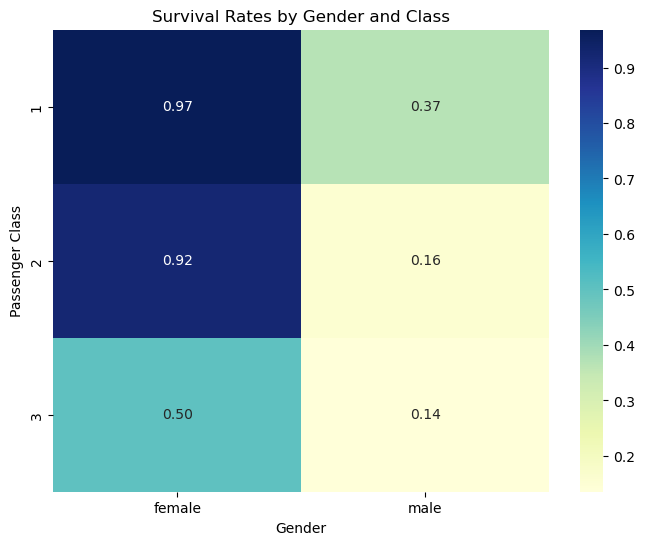

In [26]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(survival_rate, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Rates by Gender and Class')
plt.ylabel('Passenger Class')
plt.xlabel('Gender')
plt.show()


In [30]:
# Create a new column for family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1


In [32]:
# Analyze survival rates based on family size
family_survival_rate = titanic_data.groupby('FamilySize')['Survived'].mean()
print(family_survival_rate)


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


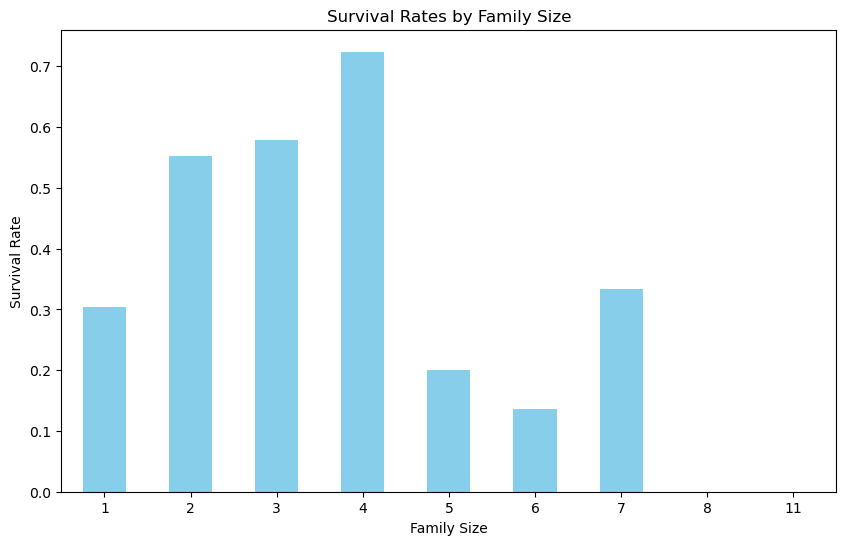

In [34]:
# Visualization
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rates by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


In [36]:
# Analyze survival rates based on embarkation port
embarkation_survival_rate = titanic_data.groupby('Embarked')['Survived'].mean()
print(embarkation_survival_rate)


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


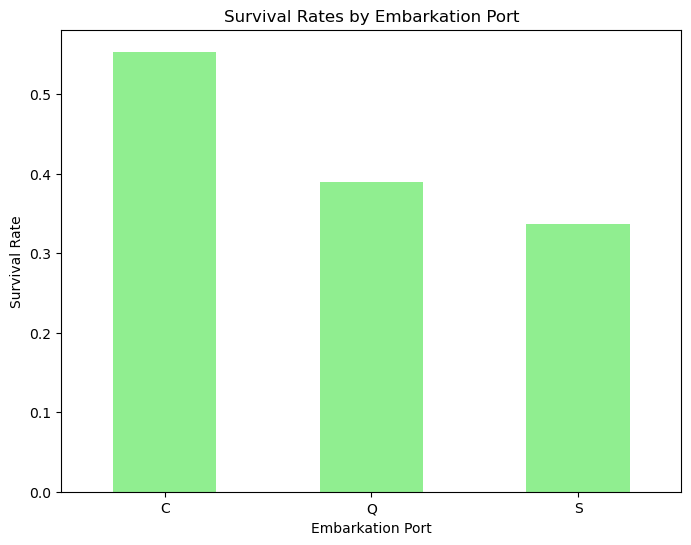

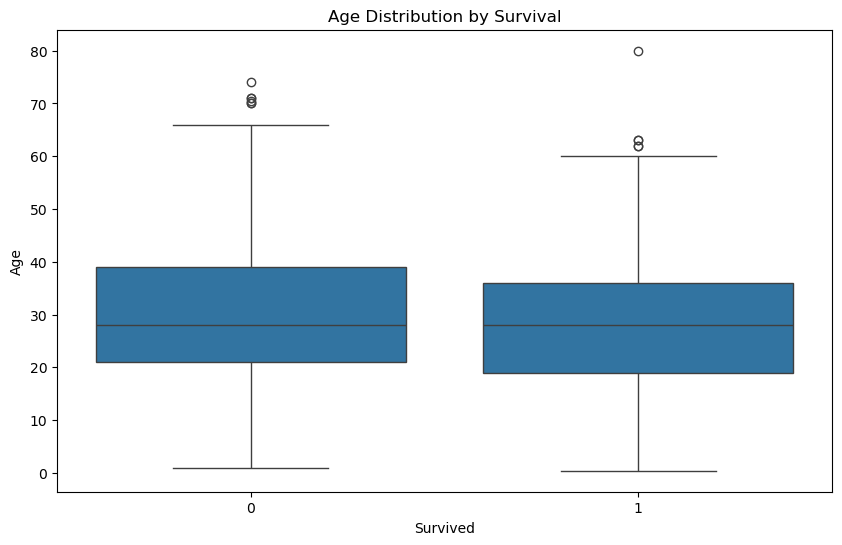

In [38]:
# Visualization
plt.figure(figsize=(8, 6))
embarkation_survival_rate.plot(kind='bar', color='lightgreen')
plt.title('Survival Rates by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()
# Analyze survival rates based on age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()



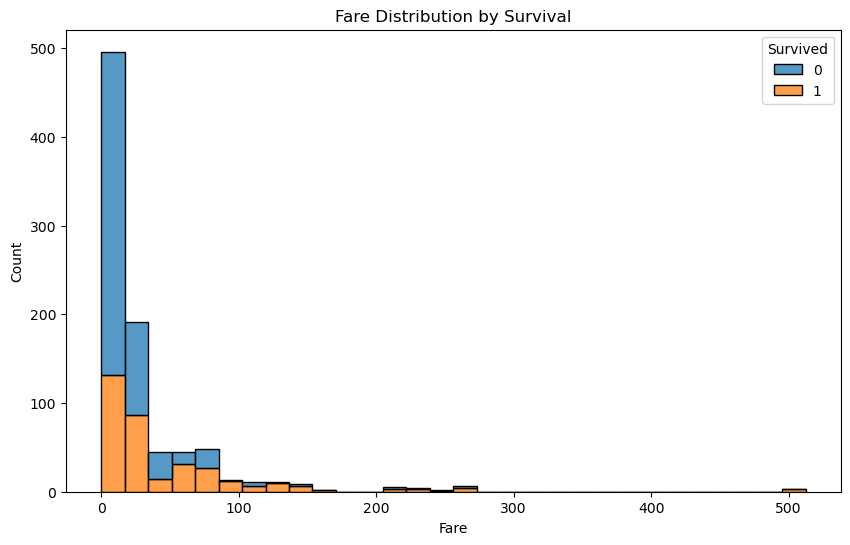

In [40]:
# Analyze survival rates based on fare
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()
